# Assessment Problems

https://github.com/ranaroussi/yfinance

## Imports

In [28]:
# Date and time handling
import datetime as dt

# Data manipulation
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

## Problem 1: Data from yfinance

In [29]:
# Fetch stocks tickers for analysis
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

### Configure filename

In order to create descriptive filename, we need to get today's date. We will use `now()` classmethod within [datetime](https://docs.python.org/3/library/datetime.html#datetime.datetime) module. `now()` allows to get current local date and time. 

In [30]:
# Get today's date 
now = dt.datetime.now()

# Display today's date
now

datetime.datetime(2025, 11, 22, 15, 48, 51, 957772)

In order to format the date and time for file names, refer to `strftime()` [Format Codes](https://docs.python.org/3/library/datetime.html#format-codes) python official documentation.

In [31]:
# Format date and time
now.strftime("%Y%m%d-%H%M%S")

'20251122-154851'

Setting the filename:
1. Specify the folder path. Since the data folder and this Jupyter notebook are in the same directory, we can refer to the folder directly by its name. Therefore, the path to the folder is "data/"
2. Generate a timestamp for the current date and time using the `datetime.now()` method, and format it with `strftime()` to produce the YYYYMMDD-HHmmss pattern.
3. Add the ".csv" extension to the filename indicate the file format and make it easily recognisable as a CSV file.

In [32]:
# File name
fileneme = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

fileneme

'data/20251122-154851.csv'

In [33]:
# Create a dataframe and download historical data for the last 5 days
df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')

# Display the first 3 rows of the data
print(df.head(3))

/tmp/ipykernel_2451/3456727915.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-17 14:30:00+00:00  269.279999  230.725006  290.899994  607.400024   
2025-11-17 15:30:00+00:00  267.879913  232.419998  288.450012  606.299988   
2025-11-17 16:30:00+00:00  268.920013  233.520004  289.011810  606.849976   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-17 14:30:00+00:00  111.029999  270.489990  234.600006  294.500000   
2025-11-17 15:30:00+00:00  110.370003  269.390015  232.500000  291.529999   
2025-11-17 16:30:00+00:00  111.209999  269.549988  233.824997  290.359985   

Price                                              ...        Open  \
Tick

Now we can combine the above steps within a single function that downloads all hourly data for the previous five days for the five FAANG stocks.

In [34]:
# Function to get data and save to CSV
def get_data():
    # Get historical data for the last 5 days
    df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')
    
    # Create a filename with the current date and time
    filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    
    # Save data to CSV
    df.to_csv(filename)
    
    return df

# Call the function to get data and save to CSV
faang_df = get_data()

/tmp/ipykernel_2451/1250225509.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h')


[*********************100%***********************]  5 of 5 completed


## Problem 2 - Plotting Data

To visualize the data, we can use the plotting capabilities of the `Matplotlib` library and save the resulting figure using the [matplotlib.pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) method. When saving the figure, we specify the path to the *plots* folder in the root of the repository, choose a file name, and save it in `.png` format. We can also control the image quality by adjusting the `dpi` parameter; however, we should keep in mind that higher-quality images require more storage space.

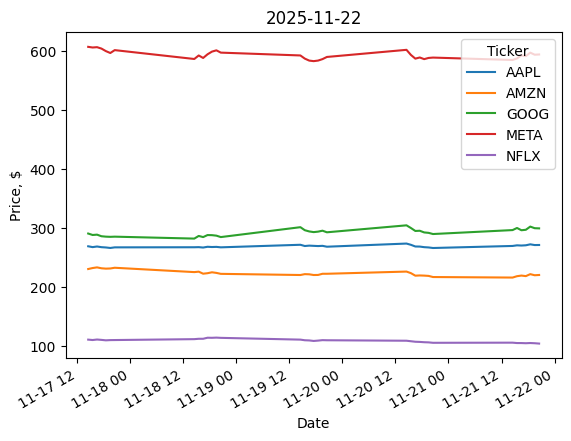

In [37]:
# Create a figure and axis for customized plotting
fig, ax = plt.subplots()

# Create a plot, passing the axis
df['Close'].plot(ax=ax)

# Set title as date and labels
ax.set_title(now.strftime('%Y-%m-%d'))
ax.set_xlabel('Date')
ax.set_ylabel('Price, $')

# Get today's date for figure naming
now = dt.datetime.now()

# Create a figure name with the current date in .png format
figure_name =  'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'

# Save the plot to a folder
# The dpi parameter sets the resolution of the saved figure
fig.savefig(figure_name, dpi = 300)

# End